<a href="https://colab.research.google.com/github/LCR2001/AI_Thinking/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
+from google.colab import drive
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/Colab Notebooks"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("train_공개.csv", encoding = "UTF-8")
df.head()

,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
0,0,18371,2,172,104.0,156,96,1,1,0,0,0,1
1,1,14455,1,164,62.0,110,70,1,1,0,0,1,0
2,2,17533,2,177,86.0,120,80,1,1,0,0,1,0
3,3,16010,2,175,88.0,120,80,1,1,0,0,1,1
4,4,16091,1,165,88.0,130,90,1,1,0,0,0,0


In [ ]:
df_test = pd.read_csv("test_공개.csv", encoding = "UTF-8")
df_test.head()

,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동
0,0,21055,1,149,55.0,120,80,1,1,0,0,1
1,1,21908,2,168,64.0,120,79,2,1,0,0,1
2,2,21147,2,172,106.0,120,80,1,1,0,0,0
3,3,19770,1,164,119.0,150,77,2,2,0,1,1
4,4,20587,2,172,69.0,120,80,2,1,1,0,0


In [ ]:
# case control study. 실제로는 1인 사람이 많지 않음. 
df["label"].value_counts() # 적절하게 학습할 수 있음. 

0    30018
1    29982
Name: label, dtype: int64

In [ ]:
df.drop(['id'], axis = 1, inplace = True)
df_test.drop(['id'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      60000 non-null  int64  
 1   성별      60000 non-null  int64  
 2   키       60000 non-null  int64  
 3   몸무게     60000 non-null  float64
 4   수축기 혈압  60000 non-null  int64  
 5   이완기 혈압  60000 non-null  int64  
 6   콜레스테롤   60000 non-null  int64  
 7   포도당     60000 non-null  int64  
 8   흡연      60000 non-null  int64  
 9   음주      60000 non-null  int64  
 10  신체활동    60000 non-null  int64  
 11  label   60000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.5 MB


In [ ]:
# 더 빠른 학습을 위해서 int64, float64를 int32, float32로 바꿔줌
columns = ['나이', '성별', '키', '몸무게', '수축기 혈압', '이완기 혈압', '콜레스테롤', '포도당', '흡연', '음주','신체활동', 'label']
columns.remove("몸무게")
df[columns] = df[columns].astype(np.int32)
df["몸무게"] = df["몸무게"].astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      60000 non-null  int32  
 1   성별      60000 non-null  int32  
 2   키       60000 non-null  int32  
 3   몸무게     60000 non-null  float32
 4   수축기 혈압  60000 non-null  int32  
 5   이완기 혈압  60000 non-null  int32  
 6   콜레스테롤   60000 non-null  int32  
 7   포도당     60000 non-null  int32  
 8   흡연      60000 non-null  int32  
 9   음주      60000 non-null  int32  
 10  신체활동    60000 non-null  int32  
 11  label   60000 non-null  int32  
dtypes: float32(1), int32(11)
memory usage: 2.7 MB


In [ ]:
# 더 빠른 학습을 위해서 int64, float64를 int32, float32로 바꿔줌
columns.remove("label")
df_test[columns] = df_test[columns].astype(np.int32)
df_test["몸무게"] = df["몸무게"].astype(np.float32)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      10000 non-null  int32  
 1   성별      10000 non-null  int32  
 2   키       10000 non-null  int32  
 3   몸무게     10000 non-null  float32
 4   수축기 혈압  10000 non-null  int32  
 5   이완기 혈압  10000 non-null  int32  
 6   콜레스테롤   10000 non-null  int32  
 7   포도당     10000 non-null  int32  
 8   흡연      10000 non-null  int32  
 9   음주      10000 non-null  int32  
 10  신체활동    10000 non-null  int32  
dtypes: float32(1), int32(10)
memory usage: 429.8 KB


In [ ]:
# 통계 속성 나열
df.describe()

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,19468.299417,1.349317,164.356983,74.226089,129.134883,96.921717,1.366150,1.226883,0.087750,0.053517,0.804483,0.499700
std,2465.005682,0.476758,8.220935,14.398274,166.156717,193.061880,0.679234,0.572433,0.282933,0.225063,0.396601,0.500004
min,10859.000000,1.000000,57.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 4가지 변수에 대해서 너무 작거나 큰 outlier들이 존재함을 알 수 있음
print("4가지 연속형 변수에 대한 최솟값")
print(df[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].min(), end = '\n\n')

print("4가지 연속형 변수에 대한 최댓값")
print(df[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].max())

4가지 연속형 변수에 대한 최솟값
키          57.0
몸무게        10.0
수축기 혈압   -150.0
이완기 혈압    -70.0
dtype: float64

4가지 연속형 변수에 대한 최댓값
키           250.0
몸무게         200.0
수축기 혈압    16020.0
이완기 혈압    11000.0
dtype: float64


In [ ]:
# 상관계수 확인
df.corr()

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
나이,1.000000,-0.024109,-0.081302,0.054133,0.019148,0.016440,0.154832,0.097959,-0.047598,-0.027399,-0.007522,0.241893
성별,-0.024109,1.000000,0.498618,0.153510,0.005118,0.013341,-0.036755,-0.023283,0.340015,0.170605,0.004922,0.005858
키,-0.081302,0.498618,1.000000,0.286028,0.005542,0.004702,-0.048827,-0.020154,0.189203,0.092942,-0.008395,-0.012858
몸무게,0.054133,0.153510,0.286028,1.000000,0.028661,0.042636,0.139712,0.103585,0.067637,0.066061,-0.017350,0.183530
수축기 혈압,0.019148,0.005118,0.005542,0.028661,1.000000,0.014630,0.022137,0.011199,-0.001957,0.000879,-0.000090,0.051684
이완기 혈압,0.016440,0.013341,0.004702,0.042636,0.014630,1.000000,0.024206,0.011552,0.004010,0.012363,0.003628,0.066142
콜레스테롤,0.154832,-0.036755,-0.048827,0.139712,0.022137,0.024206,1.000000,0.452218,0.009819,0.036774,0.010846,0.221432
포도당,0.097959,-0.023283,-0.020154,0.103585,0.011199,0.011552,0.452218,1.000000,-0.006230,0.010152,-0.005831,0.090992
흡연,-0.047598,0.340015,0.189203,0.067637,-0.001957,0.004010,0.009819,-0.006230,1.000000,0.339536,0.024418,-0.017309
음주,-0.027399,0.170605,0.092942,0.066061,0.000879,0.012363,0.036774,0.010152,0.339536,1.000000,0.025918,-0.007929


In [ ]:
# 한글 폰트 작성을 위한 환경 구축
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

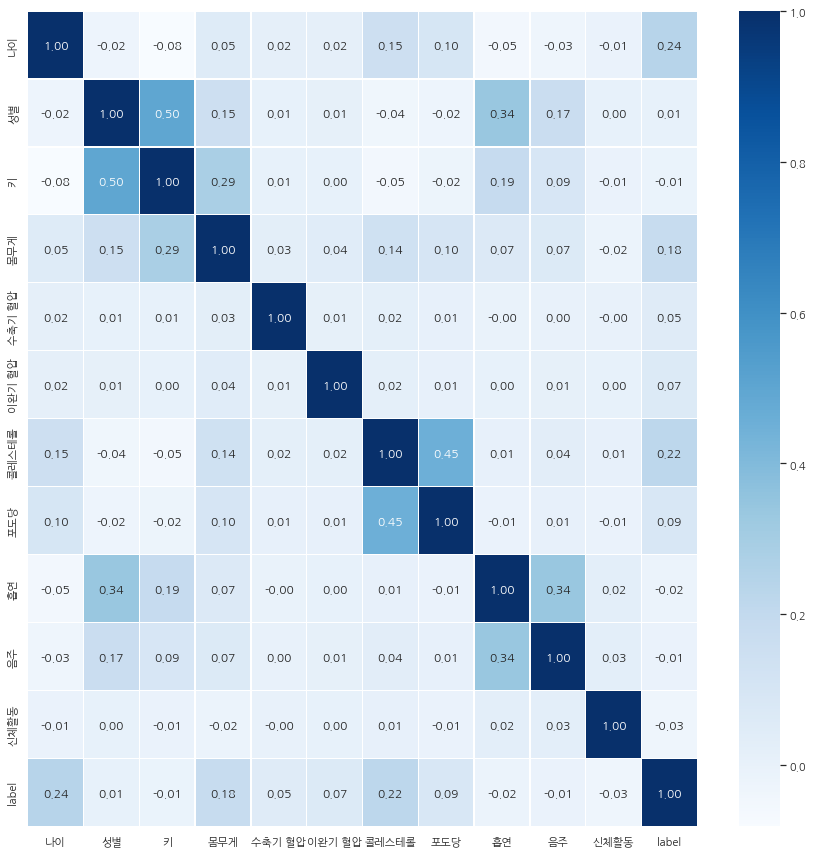

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 한글 깨짐 방지
plt.rc("font", family = "NanumGothic")
sns.set(font="NanumGothic", 
rc={"axes.unicode_minus":False})

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
def imputation_outlier(df=None, column=None, weight=1.5):
  df_copy = df.copy()
  fraud_male =  df_copy[df_copy['성별']==2][column]
  fraud_female = df_copy[df_copy['성별']==1][column]
  mquantile_25 = np.percentile(fraud_male.values,25)
  mquantile_75 = np.percentile(fraud_male.values, 75)
  fequantile_25 = np.percentile(fraud_female.values,25)
  fequantile_75 = np.percentile(fraud_female.values, 75)

  iqr_male = mquantile_75 -mquantile_25
  iqr_male_weight = iqr_male * weight

  lowest_male_val = mquantile_25 - iqr_male_weight
  highest_male_val = mquantile_75 + iqr_male_weight

  iqr_female = fequantile_75 -fequantile_25
  iqr_female_weight = iqr_female * weight

  lowest_female_val = fequantile_25 - iqr_female_weight
  highest_female_val = fequantile_75  + iqr_female_weight
  
  print(column)
  print("lowest_male_val : ", lowest_male_val)
  print("highest_male_val : ", highest_male_val)
  print("lowest_female_val : ", lowest_female_val)
  print("highest_female_val : ", highest_female_val)
  print()

  idx_male_highest = df_copy[(df["성별"] == 2) & (df_copy[column] > highest_male_val)].index
  df_copy[column].loc[idx_male_highest] = highest_male_val

  idx_male_lowest = df_copy[(df["성별"] == 2) & (df_copy[column] < lowest_male_val)].index
  df_copy[column].loc[idx_male_lowest] = lowest_male_val

  idx_female_highest = df_copy[(df["성별"] == 1) & (df_copy[column] > highest_female_val)].index
  df_copy[column].loc[idx_female_highest] = highest_female_val

  idx_female_lowest = df_copy[(df["성별"] == 1) & (df_copy[column] < lowest_female_val)].index
  df_copy[column].loc[idx_female_lowest] = lowest_female_val
  
  return df_copy

In [ ]:
df_impu_outlier1 = imputation_outlier(df.copy(), "키")
df_impu_outlier2 = imputation_outlier(df_impu_outlier1, "몸무게")
df_impu_outlier3 = imputation_outlier(df_impu_outlier2, "수축기 혈압")
df_impu_outlier4 = imputation_outlier(df_impu_outlier3, "이완기 혈압")
df_impu_outlier = df_impu_outlier4

키
lowest_male_val :  154.0
highest_male_val :  186.0
lowest_female_val :  145.0
highest_female_val :  177.0

몸무게
lowest_male_val :  42.5
highest_male_val :  110.5
lowest_female_val :  37.5
highest_female_val :  105.5

수축기 혈압
lowest_male_val :  90.0
highest_male_val :  170.0
lowest_female_val :  90.0
highest_female_val :  170.0

이완기 혈압
lowest_male_val :  65.0
highest_male_val :  105.0
lowest_female_val :  65.0
highest_female_val :  105.0



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_impu_outlier.describe()

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,19468.299417,1.349317,164.409867,73.943138,126.696150,81.766050,1.366150,1.226883,0.087750,0.053517,0.804483,0.499700
std,2465.005682,0.476758,7.701625,13.447296,16.387277,9.055894,0.679234,0.572433,0.282933,0.225063,0.396601,0.500004
min,10859.000000,1.000000,145.000000,37.500000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,186.000000,110.500000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# outlier 대체 후
print("4가지 연속형 변수에 대한 최솟값")
print(df_impu_outlier[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].min(), end = '\n\n')

print("4가지 연속형 변수에 대한 최댓값")
print(df_impu_outlier[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].max())

4가지 연속형 변수에 대한 최솟값
키         145.0
몸무게        37.5
수축기 혈압     90.0
이완기 혈압     65.0
dtype: float64

4가지 연속형 변수에 대한 최댓값
키         186.0
몸무게       110.5
수축기 혈압    170.0
이완기 혈압    105.0
dtype: float64


In [ ]:
def remove_outlier(df = None, column = None, weight = 1.5):
  df_copy = df.copy()
  fraud_male =  df_copy[df_copy['성별']==2][column]
  fraud_female = df_copy[df_copy['성별']==1][column]
  mquantile_25 = np.percentile(fraud_male.values,25)
  mquantile_75 = np.percentile(fraud_male.values, 75)
  fequantile_25 = np.percentile(fraud_female.values,25)
  fequantile_75 = np.percentile(fraud_female.values, 75)

  iqr_male = mquantile_75 -mquantile_25
  iqr_male_weight = iqr_male * weight
  lowest_male_val = mquantile_25 - iqr_male_weight
  highest_male_val = mquantile_75 + iqr_male_weight

  iqr_female = fequantile_75 -fequantile_25
  iqr_female_weight = iqr_female * weight

  lowest_female_val = fequantile_25 - iqr_female_weight
  highest_female_val = fequantile_75  + iqr_female_weight

  print(column)
  print("lowest_male_val : ", lowest_male_val)
  print("highest_male_val : ", highest_male_val)
  print("lowest_female_val : ", lowest_female_val)
  print("highest_female_val : ", highest_female_val)
  print()

  outlier_index_male = fraud_male[(fraud_male < lowest_male_val) | (fraud_male > highest_male_val)].index
  outlier_index_female = fraud_female[(fraud_female < lowest_female_val) | (fraud_female > highest_female_val)].index

  df_copy.drop(outlier_index_male, axis = 0 , inplace = True)
  df_copy.drop(outlier_index_female, axis = 0 , inplace = True)
  return df_copy

In [ ]:
df_remove_outlier1 = remove_outlier(df, "키", 1.5)
df_remove_outlier2 = remove_outlier(df_remove_outlier1, "몸무게", 1.5)
df_remove_outlier3 = remove_outlier(df_remove_outlier2, "수축기 혈압", 1.5)
df_remove_outlier4 = remove_outlier(df_remove_outlier3, "이완기 혈압", 1.5)
df_remove_outlier = df_remove_outlier4

키
lowest_male_val :  154.0
highest_male_val :  186.0
lowest_female_val :  145.0
highest_female_val :  177.0

몸무게
lowest_male_val :  42.5
highest_male_val :  110.5
lowest_female_val :  37.5
highest_female_val :  105.5

수축기 혈압
lowest_male_val :  90.0
highest_male_val :  170.0
lowest_female_val :  90.0
highest_female_val :  170.0

이완기 혈압
lowest_male_val :  65.0
highest_male_val :  105.0
lowest_female_val :  65.0
highest_female_val :  105.0



In [ ]:
df_remove_outlier.describe()

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000
mean,19491.422182,1.352645,164.405863,73.241249,126.424276,81.685896,1.358210,1.221985,0.087402,0.052558,0.806218,0.493793
std,2455.326199,0.477798,7.389409,12.321697,14.306807,7.678010,0.674902,0.568624,0.282426,0.223152,0.395264,0.499966
min,10859.000000,1.000000,145.000000,38.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17731.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19716.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21336.250000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,186.000000,110.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# outlier 제거 후
print("4가지 연속형 변수에 대한 최솟값")
print(df_remove_outlier[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].min(), end = '\n\n')

print("4가지 연속형 변수에 대한 최댓값")
print(df_remove_outlier[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].max())

4가지 연속형 변수에 대한 최솟값
키         145.0
몸무게        38.0
수축기 혈압     90.0
이완기 혈압     65.0
dtype: float64

4가지 연속형 변수에 대한 최댓값
키         186.0
몸무게       110.0
수축기 혈압    170.0
이완기 혈압    105.0
dtype: float64


In [ ]:
df_remove_outlier.info() # 약 7000개의 dataset이 사라짐.(60000-53008)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53008 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      53008 non-null  int32  
 1   성별      53008 non-null  int32  
 2   키       53008 non-null  int32  
 3   몸무게     53008 non-null  float32
 4   수축기 혈압  53008 non-null  int32  
 5   이완기 혈압  53008 non-null  int32  
 6   콜레스테롤   53008 non-null  int32  
 7   포도당     53008 non-null  int32  
 8   흡연      53008 non-null  int32  
 9   음주      53008 non-null  int32  
 10  신체활동    53008 non-null  int32  
 11  label   53008 non-null  int32  
dtypes: float32(1), int32(11)
memory usage: 2.8 MB


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
  return roc_auc

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def get_validation_dataset_regression(df=None): # validation
  df_copy = df.copy()
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size =0.2, random_state = 0, stratify=y_target)
  

  scaler = StandardScaler() # 범주형에 대해서는 의미는 크게 없음.
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  return X_train_scaled, X_test_scaled, y_train, y_test

def get_validation_dataset_classification(df=None): # validation
  df_copy = df.copy()
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size =0.2, random_state = 0, stratify=y_target)

  return X_train, X_test, y_train, y_test

In [ ]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
print("전처리를 하지 않은 기존 데이터에 대한 예측 정보\n")
X_features = df.iloc[:, :-1]
y_target = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size =0.2, random_state = 0, stratify=y_target)

print("Logistic Regression")
lr_clf = LogisticRegression(random_state = 1)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nDecision Tree Calssifier")
dt_clf = DecisionTreeClassifier(max_depth =3, random_state = 1)
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nRandom Forest Classifier")
rf_clf = RandomForestClassifier()
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nVoting Calssifier")
vo_soft_clf = VotingClassifier(estimators=[("DT", dt_clf), ("LR", lr_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

전처리를 하지 않은 기존 데이터에 대한 예측 정보

Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


오차 행렬
[[4418 1586]
 [1896 4100]]
정확도: 0.7098, 정밀도: 0.7211, 재현율:0.6838, F1:0.7019, AUC:0.7704

Decision Tree Calssifier
오차 행렬
[[4663 1341]
 [1899 4097]]
정확도: 0.7300, 정밀도: 0.7534, 재현율:0.6833, F1:0.7166, AUC:0.7837

Random Forest Classifier
오차 행렬
[[4386 1618]
 [1737 4259]]
정확도: 0.7204, 정밀도: 0.7247, 재현율:0.7103, F1:0.7174, AUC:0.7802

Voting Calssifier
오차 행렬
[[4667 1337]
 [1878 4118]]
정확도: 0.7321, 정밀도: 0.7549, 재현율:0.6868, F1:0.7192, AUC:0.7961


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("outlier를 대체한 후에 대한 예측정보\n")

X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_impu_outlier)
print("Decision Tree Calssifier")
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 1)
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nRandom Forest Classifier")
rf_clf = RandomForestClassifier(criterion = 'gini', n_jobs = 25)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_impu_outlier)
print("\nLogistic Regression")
lr_clf = LogisticRegression(random_state = 1)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nVoting Calssifier")
vo_soft_clf = VotingClassifier(estimators=[("DT", dt_clf), ("LR", lr_clf), ("RF", rf_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

outlier를 대체한 후에 대한 예측정보

Decision Tree Calssifier
오차 행렬
[[4695 1309]
 [1864 4132]]
정확도: 0.7356, 정밀도: 0.7594, 재현율:0.6891, F1:0.7226, AUC:0.7972

Random Forest Classifier
오차 행렬
[[4377 1627]
 [1759 4237]]
정확도: 0.7178, 정밀도: 0.7225, 재현율:0.7066, F1:0.7145, AUC:0.7801

Logistic Regression
오차 행렬
[[4694 1310]
 [1897 4099]]
정확도: 0.7328, 정밀도: 0.7578, 재현율:0.6836, F1:0.7188, AUC:0.7959

Voting Calssifier
오차 행렬
[[4668 1336]
 [1833 4163]]
정확도: 0.7359, 정밀도: 0.7570, 재현율:0.6943, F1:0.7243, AUC:0.8028


In [ ]:
print("outlier를 제거한 후에 대한 예측정보\n")

X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_remove_outlier)
print("Decision Tree Calssifier")
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 1)
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nRandom Forest Classifier")
rf_clf = RandomForestClassifier(criterion = 'gini', n_jobs = 25)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_remove_outlier)
print("\nLogistic Regression")
lr_clf = LogisticRegression(random_state = 1)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nVoting Calssifier")
vo_soft_clf = VotingClassifier(estimators=[("DT", dt_clf), ("LR", lr_clf), ("RF", rf_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

outlier를 제거한 후에 대한 예측정보

Decision Tree Calssifier
오차 행렬
[[4228 1139]
 [1704 3531]]
정확도: 0.7318, 정밀도: 0.7561, 재현율:0.6745, F1:0.7130, AUC:0.7941

Random Forest Classifier
오차 행렬
[[3913 1454]
 [1582 3653]]
정확도: 0.7136, 정밀도: 0.7153, 재현율:0.6978, F1:0.7064, AUC:0.7694

Logistic Regression
오차 행렬
[[4222 1145]
 [1751 3484]]
정확도: 0.7268, 정밀도: 0.7526, 재현율:0.6655, F1:0.7064, AUC:0.7947

Voting Calssifier
오차 행렬
[[4192 1175]
 [1640 3595]]
정확도: 0.7345, 정밀도: 0.7537, 재현율:0.6867, F1:0.7186, AUC:0.7980


In [ ]:
# decisionTree grid search
from sklearn.model_selection import GridSearchCV

print("Decision Tree grid Search")
X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_impu_outlier)
dtree_params = {'max_depth':[2,3,5,6,7,8,10], 'min_samples_split':[2, 3, 4, 5, 6, 8],'min_samples_leaf':[2, 5, 8, 10, 12, 15, 18, 24]}

grid_dtree = GridSearchCV(dt_clf,param_grid=dtree_params, cv=5)
get_model_train_eval(grid_dtree, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)

# 8(max_depth), 24(leaf), 2(split)

Decision Tree grid Search
오차 행렬
[[4580 1424]
 [1778 4218]]
정확도: 0.7332, 정밀도: 0.7476, 재현율:0.7035, F1:0.7249, AUC:0.7950
GridSearchCV 최적 파라미터: {'max_depth': 8, 'min_samples_leaf': 24, 'min_samples_split': 2}


In [ ]:
# # randomforest grid search
# rf_params = { 'n_estimators' : [300, 500],
#            'max_depth' : [12, 18, 24],
#            'min_samples_split' : [5],
#            'min_samples_leaf':[4, 8, 12]
#           }
# grid_rf = GridSearchCV(rf_clf, param_grid = rf_params, cv = 3, n_jobs = 25)
# get_model_train_eval(grid_rf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)
# scores_df = pd.DataFrame(grid_rf.cv_results_)
# print('GridSearchCV 최적 파라미터:', grid_rf.best_params_)

# # 12(max_depth), 12(leaf), 5(split), 500(n_estimators) => 약 72.84, auc : 80.50

In [ ]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):

  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값: ', custom_threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)
    print()

In [ ]:
# Logistic regression hyper parameter찾기
from sklearn.preprocessing import Binarizer
X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_impu_outlier)
thresholds = [0.3 , 0.33 ,0.36, 0.38, 0.39, 0.42 , 0.45 ,0.48, 0.50, 0.60, 0.65 ,0.70]

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_eval_by_threshold(y_test, pred_proba.reshape(-1, 1), thresholds)

# 0.38로 사용

임곗값:  0.3
오차 행렬
[[2317 3687]
 [ 513 5483]]
정확도: 0.6500, 정밀도: 0.5979, 재현율:0.9144, F1:0.7231, AUC:0.7959

임곗값:  0.33
오차 행렬
[[2748 3256]
 [ 674 5322]]
정확도: 0.6725, 정밀도: 0.6204, 재현율:0.8876, F1:0.7303, AUC:0.7959

임곗값:  0.36
오차 행렬
[[3154 2850]
 [ 844 5152]]
정확도: 0.6922, 정밀도: 0.6438, 재현율:0.8592, F1:0.7361, AUC:0.7959

임곗값:  0.38
오차 행렬
[[3437 2567]
 [ 969 5027]]
정확도: 0.7053, 정밀도: 0.6620, 재현율:0.8384, F1:0.7398, AUC:0.7959

임곗값:  0.39
오차 행렬
[[3564 2440]
 [1046 4950]]
정확도: 0.7095, 정밀도: 0.6698, 재현율:0.8256, F1:0.7396, AUC:0.7959

임곗값:  0.42
오차 행렬
[[3935 2069]
 [1266 4730]]
정확도: 0.7221, 정밀도: 0.6957, 재현율:0.7889, F1:0.7394, AUC:0.7959

임곗값:  0.45
오차 행렬
[[4263 1741]
 [1520 4476]]
정확도: 0.7282, 정밀도: 0.7200, 재현율:0.7465, F1:0.7330, AUC:0.7959

임곗값:  0.48
오차 행렬
[[4533 1471]
 [1743 4253]]
정확도: 0.7322, 정밀도: 0.7430, 재현율:0.7093, F1:0.7258, AUC:0.7959

임곗값:  0.5
오차 행렬
[[4694 1310]
 [1897 4099]]
정확도: 0.7328, 정밀도: 0.7578, 재현율:0.6836, F1:0.7188, AUC:0.7959

임곗값:  0.6
오차 행렬
[[5178  826]
 [2526 3470]]
정확도: 0.7207, 정

In [ ]:
# 최적의 hyper parameter까지 설정한 모델
print("outlier를 제거한 후에 대한 예측정보\n")

X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_impu_outlier)
print("Decision Tree Calssifier")
# 8(max_depth), 24(leaf), 2(split)
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_split = 2, min_samples_leaf = 24)
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nRandom Forest Classifier")
# 12(max_depth), 12(leaf), 5(split), 500(n_estimators)
rf_clf = RandomForestClassifier(criterion = 'gini', n_estimators = 500, max_depth=12, min_samples_leaf=12, min_samples_split = 5, n_jobs = 25)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)


X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_impu_outlier)
print("\nLogistic Regression")
# 0.38
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold = 0.38).fit(pred_proba)
predict = binarizer.transform(pred_proba)
print('임곗값: ', 0.38)
get_clf_eval(y_test, predict, pred_proba)
print()

print("\nVoting Calssifier")
vo_soft_clf = VotingClassifier(estimators=[("DT", dt_clf), ("LR", lr_clf), ("RF", rf_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

outlier를 제거한 후에 대한 예측정보

Decision Tree Calssifier
오차 행렬
[[4580 1424]
 [1778 4218]]
정확도: 0.7332, 정밀도: 0.7476, 재현율:0.7035, F1:0.7249, AUC:0.7950

Random Forest Classifier
오차 행렬
[[4697 1307]
 [1813 4183]]
정확도: 0.7400, 정밀도: 0.7619, 재현율:0.6976, F1:0.7284, AUC:0.8049

Logistic Regression
임곗값:  0.38
오차 행렬
[[3437 2567]
 [ 969 5027]]
정확도: 0.7053, 정밀도: 0.6620, 재현율:0.8384, F1:0.7398, AUC:0.7959


Voting Calssifier
오차 행렬
[[4700 1304]
 [1840 4156]]
정확도: 0.7380, 정밀도: 0.7612, 재현율:0.6931, F1:0.7256, AUC:0.8039


In [ ]:
X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_impu_outlier)
print("\nLogistic Regression")
# 0.38
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold = 0.38).fit(pred_proba)
predict = binarizer.transform(pred_proba)
print('임곗값: ', 0.38)
get_clf_eval(y_test, predict, pred_proba)
print()


Logistic Regression
임곗값:  0.38
오차 행렬
[[3437 2567]
 [ 969 5027]]
정확도: 0.7053, 정밀도: 0.6620, 재현율:0.8384, F1:0.7398, AUC:0.7959



In [ ]:
# F1, AUC를 비교했을 때, Logistic Regression 성능이 가장 우수했음 (임계값 0.38)
# 표준화
X_train = df_impu_outlier.iloc[:, :-1]
scaler = StandardScaler() # 범주형에 대해서는 의미는 크게 없음.
X_train_scaled = scaler.fit_transform(X_train)
Xreal_test_scaled = scaler.transform(df_test)

pred = lr_clf.predict(Xreal_test_scaled)
pred_proba = lr_clf.predict_proba(Xreal_test_scaled)[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold = 0.38).fit(pred_proba)
predict = binarizer.transform(pred_proba)

print("Done")

Done


array([[0.53822474],
       [0.53323934],
       [0.50907983],
       ...,
       [0.998961  ],
       [0.34334251],
       [0.70058476]])

In [ ]:
# csv 파일만들기
pred_proba = pred_proba.reshape(-1)
predict = predict.reshape(-1)

result = pd.DataFrame()

tmp = pd.read_csv('test_공개.csv', encoding = "UTF-8")
get_id = tmp['id']
result['id'] = get_id
result['pred_prob'] = pred_proba
result['pred_label'] = predict.astype(np.int16)
result

,id,pred_prob,pred_label
0,0,0.538225,1
1,1,0.533239,1
2,2,0.509080,1
3,3,0.800616,1
4,4,0.581148,1
...,...,...,...
9995,9995,0.261641,0
9996,9996,0.184043,0
9997,9997,0.998961,1
9998,9998,0.343343,0


In [ ]:
result.to_csv("final.csv", mode='w', index = False)